In [16]:
!pip install pandas
!pip install yfinance
!pip install scipy

In [32]:
import pandas as pd
import yfinance as yf
from scipy import stats
from scipy.stats import norm
import pylab

In [3]:
ativos_var = ['PETR4.SA', 'VALE3.SA', 'CMIG3.SA']
port_var = yf.download(ativos_var, start='2021-01-01', end='2024-12-31')['Close']
port_var.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


Ticker,CMIG3.SA,PETR4.SA,VALE3.SA
Date,,,
2021-01-04,5.573403,11.518521,59.355217
2021-01-05,5.604502,11.968743,60.354645
2021-01-06,5.711616,11.992649,62.334019
2021-01-07,5.649421,12.351234,66.403084
2021-01-08,6.001862,12.399044,66.195404


In [4]:
port_var['port_cmig'] = 1000*port_var['CMIG3.SA']
port_var['port_petr'] = 1000*port_var['PETR4.SA']
port_var['port_vale'] = 1000*port_var['VALE3.SA']
port_var['port'] = port_var['port_cmig']+port_var['port_petr']+port_var['port_vale']
port_var['port_cmig%'] = port_var['port_cmig']/port_var['port']
port_var['port_petr%'] = port_var['port_petr']/port_var['port']
port_var['port_vale%'] = port_var['port_vale']/port_var['port']
port_var.head()

Ticker,CMIG3.SA,PETR4.SA,VALE3.SA,port_cmig,port_petr,port_vale,port,port_cmig%,port_petr%,port_vale%
Date,,,,,,,,,,
2021-01-04,5.573403,11.518521,59.355217,5573.403358,11518.521309,59355.216980,76447.141647,0.072905,0.150673,0.776422
2021-01-05,5.604502,11.968743,60.354645,5604.501724,11968.743324,60354.644775,77927.889824,0.071919,0.153587,0.774494
2021-01-06,5.711616,11.992649,62.334019,5711.615562,11992.649078,62334.018707,80038.283348,0.071361,0.149836,0.778803
2021-01-07,5.649421,12.351234,66.403084,5649.421215,12351.234436,66403.083801,84403.739452,0.066933,0.146335,0.786732
2021-01-08,6.001862,12.399044,66.195404,6001.862049,12399.044037,66195.404053,84596.310139,0.070947,0.146567,0.782486


<Axes: xlabel='Date'>

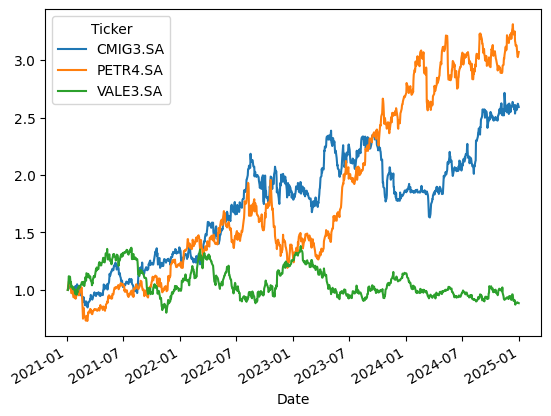

In [5]:
(port_var.iloc[:,:3]/port_var.iloc[0,:3]).plot()

<Axes: xlabel='Date'>

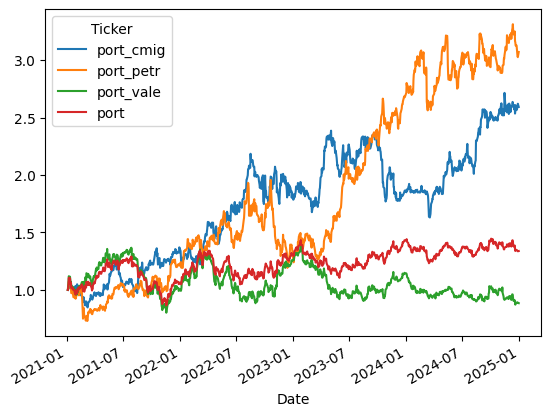

In [9]:
(port_var.iloc[:,3:7]/port_var.iloc[0,3:7]).plot()

In [10]:
port_var['ret_cmig_21'] = port_var['port_cmig'] / port_var['port_cmig'].shift(21) - 1
port_var['ret_petr_21'] = port_var['port_petr'] / port_var['port_petr'].shift(21) - 1
port_var['ret_vale_21'] = port_var['port_vale'] / port_var['port_vale'].shift(21) - 1
port_var['ret_port_21'] = port_var['port'] / port_var['port'].shift(21) - 1
port_var.dropna(inplace=True)
port_var.head()

Ticker,CMIG3.SA,PETR4.SA,VALE3.SA,port_cmig,port_petr,port_vale,port,port_cmig%,port_petr%,port_vale%,ret_cmig_21,ret_petr_21,ret_vale_21,ret_port_21
Date,,,,,,,,,,,,,,
2021-02-03,5.846372,11.530476,58.686779,5846.371651,11530.475616,58686.779022,76063.626289,0.076862,0.151590,0.771549,0.048977,0.001038,-0.011262,-0.005017
2021-02-04,5.770355,11.482660,57.946938,5770.355225,11482.660294,57946.937561,75199.953079,0.076733,0.152695,0.770571,0.029593,-0.040613,-0.039893,-0.035006
2021-02-05,5.715070,11.490631,60.153454,5715.070248,11490.631104,60153.453827,77359.155178,0.073877,0.148536,0.777587,0.000605,-0.041860,-0.034982,-0.033473
2021-02-08,5.756535,11.199780,61.010109,5756.534576,11199.779510,61010.108948,77966.423035,0.073834,0.143649,0.782518,0.018960,-0.093226,-0.081216,-0.076268
2021-02-09,5.683974,10.972678,61.165859,5683.973789,10972.678185,61165.859222,77822.511196,0.073038,0.140996,0.785966,-0.052965,-0.115038,-0.075980,-0.080072


<Axes: xlabel='Date'>

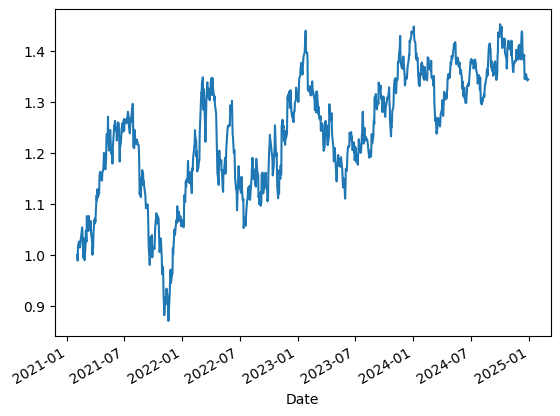

In [11]:
(port_var['port']/port_var['port'].iloc[0]).plot()

In [30]:
normaltest_port=stats.normaltest(port_var['ret_port_21'])
print(normaltest_port)

NormaltestResult(statistic=np.float64(0.14278183951875778), pvalue=np.float64(0.9310978364317697))


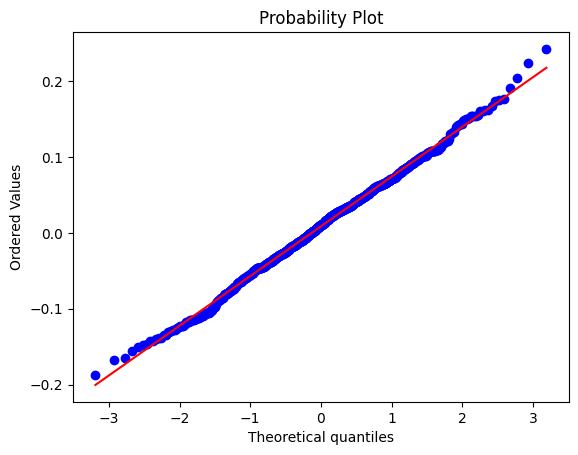

In [33]:
stats.probplot(port_var['ret_port_21'], dist="norm", plot=pylab)
pylab.show()

In [13]:
desv_pad_cmig = port_var['ret_cmig_21'].std()
desv_pad_petr = port_var['ret_petr_21'].std()
desv_pad_vale = port_var['ret_vale_21'].std()

In [19]:
var_cmig= port_var['ret_cmig_21'].mean()-(norm.ppf(0.05)*-1*desv_pad_cmig)
var_petr= port_var['ret_petr_21'].mean()-(norm.ppf(0.05)*-1*desv_pad_petr)
var_vale= port_var['ret_vale_21'].mean()-(norm.ppf(0.05)*-1*desv_pad_vale)

print('VaR CMIG (%) 95%CI: ', var_cmig*100)
print('VaR PETR:(%) 95%CI', var_petr*100)
print('VaR VALE:(%) 95%CI', var_vale*100)

VaR CMIG (%) 95%CI:  -12.582080046941682
VaR PETR:(%) 95%CI -13.260340805950813
VaR VALE:(%) 95%CI -13.986406185308562


In [21]:
vari_cmig=desv_pad_cmig**2
vari_petr=desv_pad_petr**2
vari_vale=desv_pad_vale**2
corr_cmig_petr = port_var['ret_cmig_21'].corr(port_var['ret_petr_21'])
corr_cmig_vale = port_var['ret_cmig_21'].corr(port_var['ret_vale_21'])
corr_petr_vale = port_var['ret_petr_21'].corr(port_var['ret_vale_21'])
wcmig=port_var['port_cmig%'].iloc[-1]
wpetr=port_var['port_petr%'].iloc[-1]
wvale=port_var['port_vale%'].iloc[-1]

In [26]:
vari_port=(wcmig*vari_cmig+wpetr*vari_petr+wvale*vari_vale)+(2*wcmig*wpetr*corr_cmig_petr)+(2*wcmig*wvale*corr_cmig_vale)+(2*wpetr*wvale*corr_petr_vale)
desv_pad_port=vari_port**0.5
print('Value at Risk Portfólio:', (port_var['ret_port_21'].mean()-(-1*norm.ppf(0.05)*desv_pad_port)*100).round(2),"%")

Value at Risk Portfólio: -25.43 %
